In [1]:
import numpy as np
import sympy as sym
import matplotlib.pyplot as plt

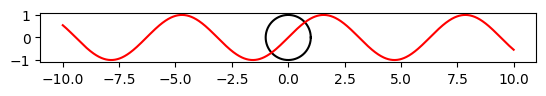

In [3]:
thetas = np.linspace(0, 2*np.pi, 1000)
x = np.cos(thetas)
y = np.sin(thetas)

x1 = np.linspace(-10, 10, 1000)
y1 = np.sin(x1)

plt.plot(x, y, 'k-')
plt.plot(x1, y1, 'r-')

plt.gca().set_aspect('equal')
plt.show()

In [8]:
x, y, r = sym.symbols('x, y, r')

expr1 = sym.sin(x) - sym.sqrt(1-x**2)
expr2 = sym.sin(x) - sym.sqrt(1-x**2)


sym.solve(expr1, x)

NotImplementedError: multiple generators [sin(x), sqrt(1 - x**2)]
No algorithms are implemented to solve equation -sqrt(1 - x**2) + sin(x)

In [23]:
import numpy as np

# Define the unit circle equation
def circle_eq(x, r=1):
    expr1 = np.sqrt(r**2 - x**2)
    expr2 = -np.sqrt(r**2 - x**2)
    
    diff1 = expr1 - np.sin(x)
    diff2 = expr2 - np.sin(x)

    x_values = np.linspace(-1, 1, 10000)

    coeffs1 = np.polyfit(x_values, diff1, deg=7)
    coeffs2 = np.polyfit(x_values, diff2, deg=7)

    roots1 = np.roots(coeffs1)
    roots2 = np.roots(coeffs2)

    x_val_1 = [root.real for root in roots1 if np.isreal(root) and -1<= root <= 1]
    x_val_2 = [root.real for root in roots2 if np.isreal(root) and -1<= root <= 1]
    y_val_1 = [np.sqrt(r**2 - x**2) for x in x_val_1]
    y_val_2 = [-np.sqrt(r**2 - x**2) for x in x_val_2]




real_roots = zip(x_val, y_val)

for el in real_roots:
    print(el)

# # Calculate the y values by plugging the x values into either the circle or sin_x function
# y1, y2 = circle(x1), circle(x2)

# # Combine x and y solutions into coordinates
# intersections = [(x1, y1), (x2, y2)]

# print("Intersection points:")
# for point in intersections:
#     print(f"({point[0].real:.4f}, {point[1]:.4f})")



TypeError: loop of ufunc does not support argument 0 of type Add which has no callable sqrt method

In [37]:
def circle_1(x):
    return np.sqrt(1 - x**2)
def circle_2(x):
    return -np.sqrt(1 - x**2)


# Define the difference between the circle and sine functions
def func_diff_1(x):
    return circle_1(x) - np.cos(x)

def func_diff_2(x):
    return circle_2(x) - np.cos(x)

# Create a polynomial approximation of the difference function
def intersections(func_diff, y_val_func):
    x_values = np.linspace(-1, 1, 1000)
    coeffs = np.polyfit(x_values, func_diff(x_values), deg=5)

    roots = np.roots(coeffs)

    x_val = [root.real for root in roots if np.isreal(root) and -1 <= root <= 1]
    y_val = [y_val_func(el) for el in x_val]

    return {"x": x_val, "y": y_val}

inters1 = intersections(func_diff_2, circle_2)
inters2 = intersections(func_diff_2, circle_2)

x = inters1['x'] + inters2['x']
y = inters1['y'] + inters2['y']

print(x)
print(y)

[]
[]


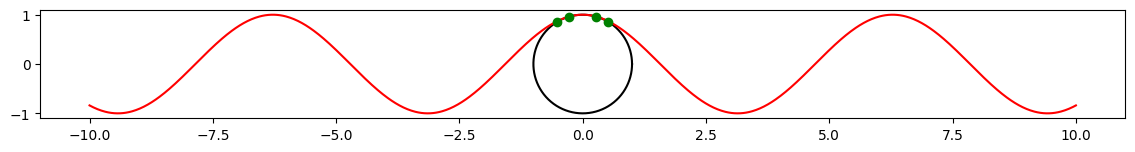

In [38]:
thetas = np.linspace(0, 2*np.pi, 1000)
x = np.cos(thetas)
y = np.sin(thetas)

x1 = np.linspace(-10, 10, 1000)
y1 = np.cos(x1)

int1 = intersections(func_diff_1, circle_1)
int2 = intersections(func_diff_2, circle_2)

plt.plot(x, y, 'k-')
plt.plot(x1, y1, 'r-')
plt.plot(int1['x'], int1['y'], 'go')
plt.plot(int2['x'], int2['y'], 'go')

plt.gca().set_aspect('equal')
plt.gcf().set_size_inches(14, 10)
plt.show()